<h1 style="color:white; text-align:center;">FRAUD DETECTION USING RANDOM FOREST ML MODEL</h1>


# LIBRARIES & DATA IMPORTATION

In [82]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,  RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from memory_profiler import memory_usage

In [45]:
df = pd.read_csv("creditcard.csv")

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


 # EXPLOLATORY ANALYSIS

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57531 entries, 0 to 57530
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57531 non-null  int64  
 1   V1      57531 non-null  float64
 2   V2      57531 non-null  float64
 3   V3      57531 non-null  float64
 4   V4      57531 non-null  float64
 5   V5      57530 non-null  float64
 6   V6      57530 non-null  float64
 7   V7      57530 non-null  float64
 8   V8      57530 non-null  float64
 9   V9      57530 non-null  float64
 10  V10     57530 non-null  float64
 11  V11     57530 non-null  float64
 12  V12     57530 non-null  float64
 13  V13     57530 non-null  float64
 14  V14     57530 non-null  float64
 15  V15     57530 non-null  float64
 16  V16     57530 non-null  float64
 17  V17     57530 non-null  float64
 18  V18     57530 non-null  float64
 19  V19     57530 non-null  float64
 20  V20     57530 non-null  float64
 21  V21     57530 non-null  float64
 22

In [12]:
pip install skimpy --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.5 which is incompatible.


In [13]:
from skimpy import skim

skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 57531  │ │ float64     │ 30    │                                                          │
│ │ Number of columns │ 31     │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA  ┃ NA %  ┃ mean      ┃ sd     ┃ p0     ┃ p25       ┃ p50      ┃ p75     ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Time         │   0 │     0 │     31170 │  13540 │      0 │     25510 │    35150 │   41390 │ 47950 │ ▃▂▁▃▇▇ │  │
│ │ V1           │   0 │     0 │   -0.2384 │  1.867 │ -56.41 │   -0.9943 │  -0.2447 │   1.155 │  1.96 │      ▇ │  │
│ │ V2           │   0 │     0 │ -0.008003 │  1.644 │ -72.72 │    -0.582 │  0.07466 │  0.7316 │ 18.18 │     ▇  │  │
│ │ V3           │   0 │     0 │    0.6902 │  1.457 │ -32.97 │    0.2077 │   0.7831 │   1.417 │ 4.102 │      ▇ │  │
│ │ V4           │   0 │     0 │    0.1716 │  1.388 │ -5.173 │   -0.7279 │   0.1824 │   1.054 │ 16.49 │  ▁▇▁   │  │
│ │ V5           │   1 │     0 │     -0.26 │  1.399 │ -42.15 │   -0.8779 │  -0.2936 │  0.2793 │  34.8 │     ▇  │  │
│ │ V6           │   1 │     0 │    0.1029 │   1.31 │ -26.16 │   -0.6354 │  -0.1525 │  0.4919 │ 22.53 │     ▇  │  │
│ │ V7           │   1 │     0 │   -0.1173 │  1.257 │ -26.55 │   -0.6063 │ -0.07569 │  0.4247 │ 36.68 │    ▇   │  │
│ │ V8           │   1 │     0 │   0.05605 │  1.195 │ -41.48 │   -0.1454 │  0.06132 │  0.3358 │ 20.01 │    ▁▇  │  │
│ │ V9           │   1 │     0 │   0.07282 │  1.189 │ -9.284 │   -0.6427 │ -0.03275 │  0.7514 │ 10.39 │    ▇▃  │  │
│ │ V10          │   1 │     0 │  -0.04761 │  1.114 │ -18.27 │   -0.5217 │   -0.104 │  0.4288 │  13.2 │     ▇  │  │
│ │ V11          │   1 │     0 │    0.3383 │  1.106 │  -4.05 │   -0.4621 │   0.2866 │   1.136 │ 12.02 │  ▁▇▂   │  │
│ │ V12          │   1 │     0 │   -0.2691 │  1.287 │ -17.77 │   -0.7818 │ 0.009846 │  0.5638 │ 4.846 │     ▇▁ │  │
│ │ V13          │   1 │     0 │     0.124 │  1.102 │ -3.845 │   -0.6121 │  0.07424 │  0.8312 │ 4.465 │  ▂▇▆▁  │  │
│ │ V14          │   1 │     0 │    0.1363 │  1.084 │ -19.21 │    -0.312 │   0.1229 │  0.6076 │ 7.692 │     ▇  │  │
│ │ V15          │   1 │     0 │     0.137 │  0.944 │ -4.153 │   -0.4204 │   0.2499 │   0.814 │ 5.785 │   ▂▇▃  │  │
│ │ V16          │   1 │     0 │  -0.01296 │  0.938 │ -13.56 │   -0.4939 │  0.05751 │  0.5458 │ 6.099 │    ▃▇  │  │
│ │ V17          │   1 │     0 │    0.1003 │  1.068 │ -25.16 │   -0.3724 │  0.04569 │  0.5197 │ 9.254 │     ▇  │  │
│ │ V18          │   1 │     0 │  -0.09378 │ 0.8688 │ -9.499 │   -0.5702 │ -0.07888 │  0.4007 │ 4.296 │    ▅▇  │  │
│ │ V19          │   1 │     0 │  -0.02543 │ 0.8181 │ -4.933 │     -0.52 │ -0.03065 │  0.4826 │ 5.228 │    ▇▆  │  │
│ │ V20          │   1 │     0 │    0.0479 │ 0.7347 │ -15.81 │   -0.1656 │ -0.02228 │   0.173 │ 26.24 │    ▇   │  │
│ │ V21          │   1 │     0 │  -0.02763 │ 0.7248 │ -20.26 │   -0.2288 │ -0.06396 │  0.1122 │ 22.61 │    ▇   │  │
│ │ V22          │   1 │     0 │   -0.1063 │ 0.6363 │ -8

**check & drop null values in the dataframe**

In [14]:
df.isnull().sum().to_frame(name='Missing Values').T


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Missing Values,0,0,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [46]:
df = df.dropna()

**check distribution of all features**

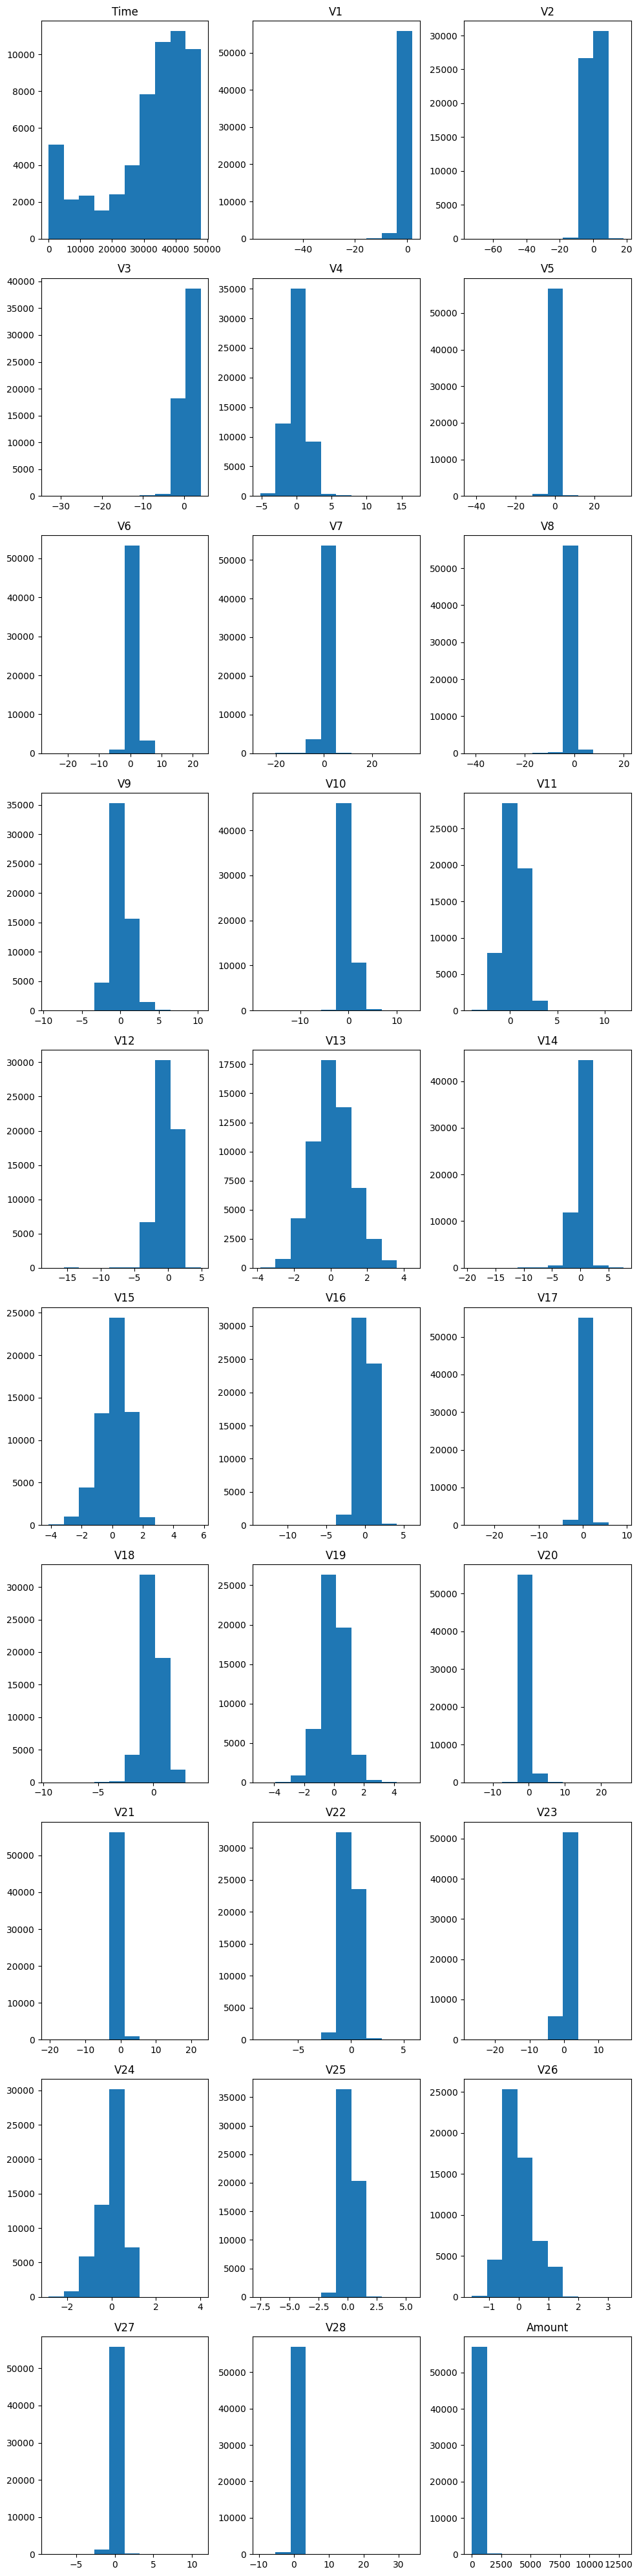

In [16]:
fig, axs = plt.subplots(10, 3, figsize=(10, 40))

axs = axs.flatten()

# Assuming 'df' has 30 numerical columns to plot
for i, col in enumerate(df.select_dtypes(include=['number']).columns[:30]):
    axs[i].hist(df[col])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

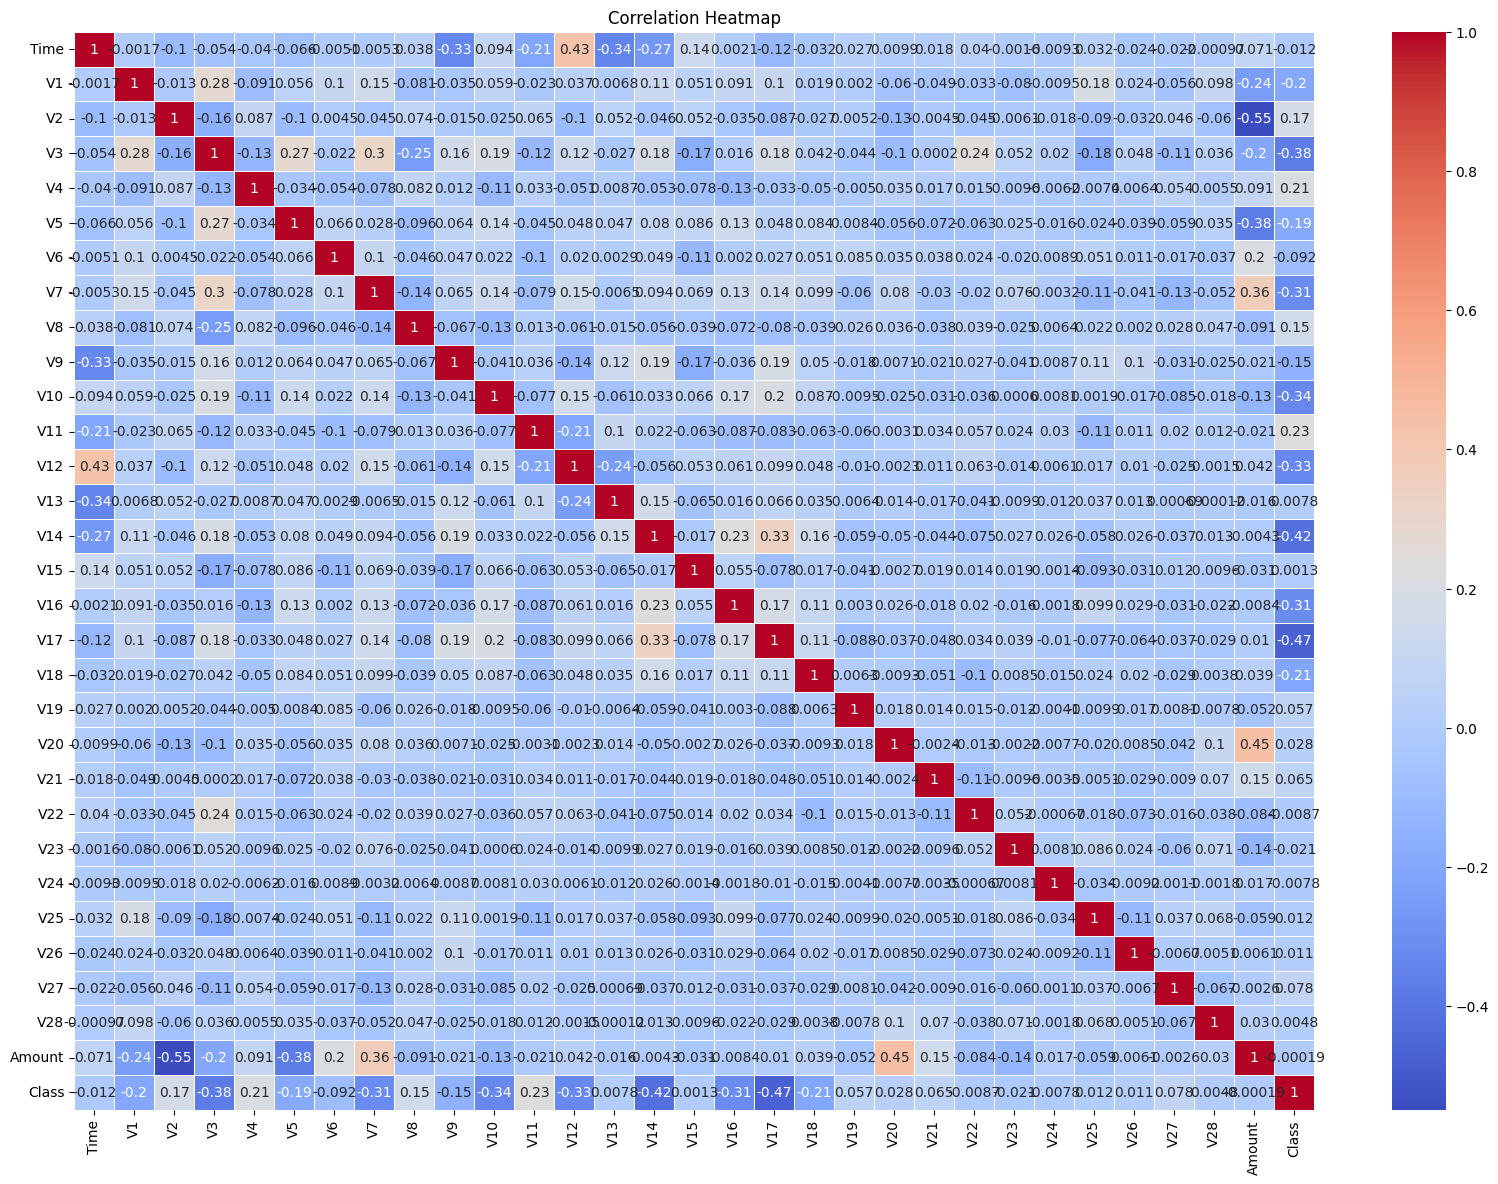

In [17]:
correlation = df.corr()


plt.figure(figsize=(20, 14))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



<Axes: xlabel='Class'>

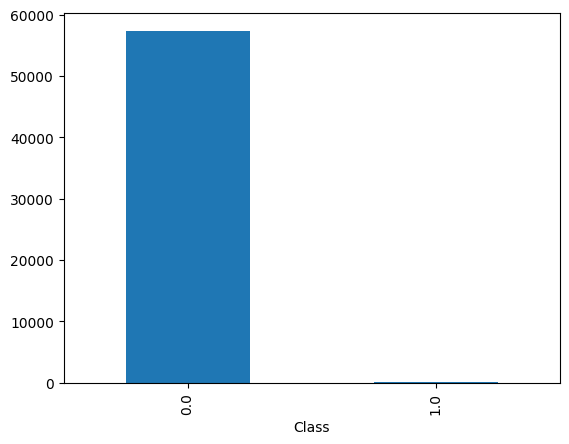

In [18]:

#Display distribution of 0 and 1 values in class feature
df['Class'].value_counts().plot(kind = 'bar')


# Data Preprocessing

**RESAMPLING**

Resampling of data to reduce imbalance in the dataset since there are more not_fraud cases than fraud cases

In [48]:
# Separate majority and minority classes
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0]

# Check if fraud_df is empty and handle the case
if len(fraud_df) == 0:
    print("No fraud cases found in the dataset. Undersampling cannot be performed.")
else:
    # Undersample the majority class
    non_fraud_undersampled = resample(non_fraud_df,
                                      replace=False,
                                      n_samples=len(fraud_df),
                                      random_state=42)

    # Combine minority class with undersampled majority class
    balanced_df = pd.concat([fraud_df, non_fraud_undersampled])

    # Shuffle the combined dataset
    balanced_df = balanced_df.sample(frac=1, random_state=42)

    balanced_df.head()

In [59]:
# Display the first few rows of the balanced DataFrame
print("Original DataFrame Shape:", balanced_df.shape)
print(balanced_df.head())

# Select only numerical columns for Z-score calculation
numerical_cols = balanced_df.select_dtypes(include=['number']).columns
# Apply Z-score to numerical columns only
z_scores = balanced_df[numerical_cols].apply(zscore)


# Set a threshold for identifying outliers
threshold = 3

# Filter out rows that have z-scores greater than the threshold in any column
# Concatenate the numerical features with non-numerical features after outlier removal
balanced_df_no_outliers = pd.concat([balanced_df[numerical_cols][(z_scores < threshold).all(axis=1)],
                                      balanced_df.select_dtypes(exclude=['number'])], axis=1)
balanced_df_no_outliers = balanced_df_no_outliers.dropna()

# Display the shape of the DataFrame after removing outliers
print("\nDataFrame Shape After Removing Outliers:", balanced_df_no_outliers.shape)
print(balanced_df_no_outliers.head())

Original DataFrame Shape: (984, 31)
            Time        V1        V2        V3        V4        V5        V6  \
255545  157278.0  1.984787 -1.937036  0.486613 -1.245536 -2.518536 -0.544524   
248296  153875.0 -0.613696  3.698772 -5.534941  5.620486  1.649263 -2.335145   
76163    56424.0  0.319007 -1.072867 -0.216146  1.494709 -0.627063 -0.761867   
239501  150139.0 -6.682832 -2.714268 -5.774530  1.449792 -0.661836 -1.148650   
143336   85285.0 -6.713407  3.921104 -9.746678  5.148263 -5.151563 -2.099389   

              V7        V8        V9  ...       V21       V22       V23  \
255545 -1.819244 -0.074875 -0.659777  ...  0.174011  0.889289  0.218248   
248296 -0.907188  0.706362 -3.747646  ...  0.319261 -0.471379 -0.075890   
76163   0.941687 -0.430272 -0.267431  ...  0.332521 -0.022461 -0.537691   
239501  0.849686  0.433427 -1.315646  ...  0.220526  1.187013  0.335821   
143336 -5.937767  3.578780 -4.684952  ...  0.954272 -0.451086  0.127214   

             V24       V25      

In [60]:
balanced_df.shape

(984, 31)

In [61]:
X = balanced_df_no_outliers.drop('Class', axis=1)
y = balanced_df_no_outliers['Class']


In [63]:
#Normalize the entire dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

**DIMENSIONALITY REDUCTION USING PRINCIPAL COMPONENT ANALYSIS AND TSNE**

In [68]:
fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color= y)
fig.update_layout(
    title = "PCA VISUALIZATION",
    yaxis_title = 'Principal Component 2',
    xaxis_title = 'Principal Component 1'

)
fig.show()

In [69]:
# Initialize PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create a 3D scatter plot with Plotly
fig = px.scatter_3d(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    z=X_pca[:, 2],
    color=y,
    labels={'x': 'Principal Component 1', 'y': 'Principal Component 2', 'z': 'Principal Component 3'},
    title='3D PCA Visualization'
)

# Update layout for axis titles
fig.update_layout(
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3'
    )
)

# Show the plot
fig.show()


In [70]:
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y)
fig.show()

In [28]:
# Initialize t-SNE with 3 components
tsne = TSNE(n_components=3, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

# Create a 3D scatter plot with Plotly
fig = px.scatter_3d(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    z=X_tsne[:, 2],
    color=y,
    labels={'x': 'Component 1', 'y': 'Component 2', 'z': 'Component 3'},
    title='3D t-SNE Visualization'
)

# Show the plot
fig.show()


Number of components for 90% explained variance: 1
Number of components for 95% explained variance: 1


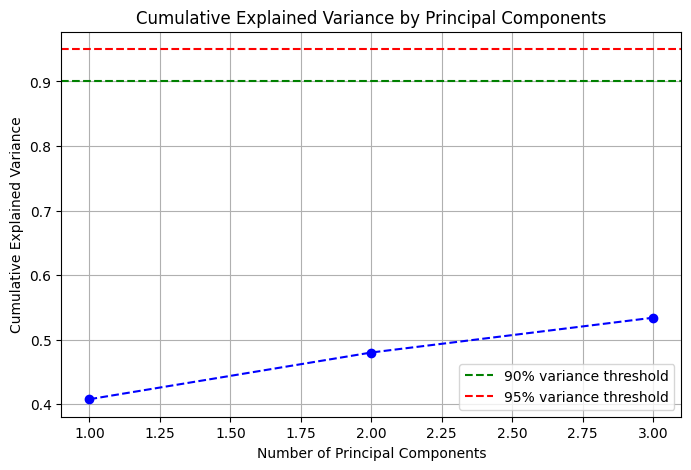

In [72]:
# Step 3: Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Step 4: Find the number of components to reach 90% or 95% explained variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components for 90% explained variance: {n_components_90}")
print(f"Number of components for 95% explained variance: {n_components_95}")

# Step 5: Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% variance threshold')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance threshold')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.show()

In [73]:
X_pca = PCA(n_components=1).fit_transform(X)
X_tsne = TSNE(n_components=1).fit_transform(X)

**Split and Train dataset**

In [74]:
# Reshape the data since we need a 2D array for sklearn
X_pca = X_pca.reshape(-1, 1)
# Split and Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SUPPORT VECTOR MACHINES MODEL TRAINING AND PREDICTION

In [79]:
# Start time
start_time = time.time()

# Measure initial memory usage
mem_usage_start = memory_usage()[0]

# Create and train the SVM
svm = SVC(kernel='rbf',
          C=1.0,
          random_state=42)
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# If you want to tune hyperparameters, you can use GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto', 0.1, 0.01]
}

grid_search = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Use the best model
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)

# Measure end memory usage
mem_usage_end = memory_usage()[0]

# Calculate time taken
end_time = time.time()
time_taken = end_time - start_time


print("\nBest Model Classification Report:")
print(classification_report(y_test, y_pred_best))


    # Print time and memory usage
print(f"\nTime Taken: {time_taken:.2f} seconds")
print(f"Memory Used: {mem_usage_end - mem_usage_start:.2f} MB")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       148
         1.0       0.95      0.91      0.93       119

    accuracy                           0.94       267
   macro avg       0.94      0.93      0.94       267
weighted avg       0.94      0.94      0.94       267


Confusion Matrix:
[[142   6]
 [ 11 108]]

Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.9364371429190479

Best Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       148
         1.0       0.93      0.94      0.94       119

    accuracy                           0.94       267
   macro avg       0.94      0.94      0.94       267
weighted avg       0.94      0.94      0.94       267


Time Taken: 12.92 seconds
Memory Used: 0.00 MB


# RANDOM FOREST MODEL TRAINING AND PREDICTION

In [87]:
# Function to train and evaluate the model with time and memory profiling
def train_and_evaluate(X_train, X_test, y_train, y_test):
    # Start time
    start_time = time.time()

    # Measure initial memory usage
    mem_usage_start = memory_usage()[0]

    # Train a classifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Measure end memory usage
    mem_usage_end = memory_usage()[0]

    # Calculate time taken
    end_time = time.time()
    time_taken = end_time - start_time

    # Evaluate model
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Print time and memory usage
    print(f"\nTime Taken: {time_taken:.2f} seconds")
    print(f"Memory Used: {mem_usage_end - mem_usage_start:.2f} MB")

# Call the function with train and test datasets
model = train_and_evaluate(X_train, X_test, y_train, y_test)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       148
         1.0       0.94      0.92      0.93       119

    accuracy                           0.94       267
   macro avg       0.94      0.94      0.94       267
weighted avg       0.94      0.94      0.94       267

Confusion Matrix:
 [[141   7]
 [  9 110]]

Time Taken: 0.69 seconds
Memory Used: 0.00 MB


 **Discussion**

Both models have demonstrated strong performance, achieving an accuracy of 94%. Let's dive into a comparison of key aspects to help decide which model is more suitable for deployment:

a) Accuracy and F1-Score
Both models have identical accuracy (94%) and very similar macro average F1-scores:
SVM: 0.94
Random Forest: 0.94
This indicates that both models are equally effective in distinguishing between the "Fraud" and "Not Fraud" classes.

b) Precision and Recall
The SVM model shows slightly higher precision for the "Fraud" class (0.95 vs. 0.94) but slightly lower recall (0.91 vs. 0.92) compared to the Random Forest.
The Random Forest model has a slightly better balance between recall for the "Fraud" class while still maintaining high precision.

c) Confusion Matrix
Both models show very low misclassification rates, but:
SVM has slightly fewer false positives (6 vs. 7).
Random Forest has fewer false negatives (9 vs. 11).
In fraud detection, reducing false negatives (i.e., identifying fraud cases correctly) is often more critical to minimize financial losses. Therefore, the Random Forest model is slightly better in this aspect.

d) Training Time
Random Forest is significantly faster to train, taking only 0.49 seconds compared to 12.92 seconds for the SVM model.
Faster training times are beneficial, especially if frequent retraining is needed due to changes in fraud patterns or periodic model updates.
e) Memory Usage
Both models have negligible memory usage, so this is not a differentiating factor.
3. Conclusion: Which Model to Deploy?
Based on the analysis:

Random Forest is preferable for deployment due to its faster training time and slightly better performance in reducing false negatives (i.e., detecting fraud cases more effectively).
The slight advantage in recall for the "Fraud" class means that it is better at minimizing missed fraud cases, which is crucial in fraud detection scenarios.
4. Recommendation
Deploy the Random Forest model due to:

Balanced Precision & Recall: High precision and recall, especially for detecting fraud cases.
Efficiency: Much faster training time, making it more suitable for real-time applications or environments requiring quick retraining.
Lower False Negatives: Prioritizing the correct identification of fraud cases.

# SAVING MODEL FOR DEPLOYMENT

In [88]:
# Save the model to a file
model_filename = 'random_forest_fraud_model.joblib'
dump(model, model_filename)

print(f"Model saved as {model_filename}")

Model saved as random_forest_fraud_model.joblib
